# Biased vs Unbiased Random Walk

This notebook compares an unbiased random walk with a biased random walk in 1D.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Random Walk Function

In [3]:
def random_walk(n_steps, p_right=0.5):
    steps = np.random.choice([-1, 1], size=n_steps, p=[1-p_right, p_right])
    position = np.cumsum(steps)
    return position

## Simulate Walks

In [4]:
n_steps = 1000

rw_unbiased = random_walk(n_steps, p_right=0.5)
rw_biased = random_walk(n_steps, p_right=0.6)

## Plot Trajectories

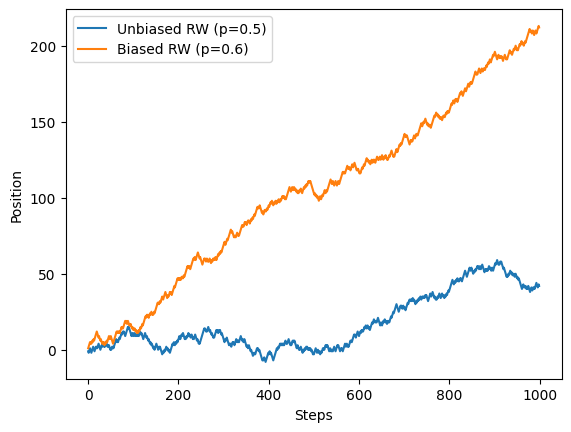

In [5]:
plt.figure()
plt.plot(rw_unbiased, label='Unbiased RW (p=0.5)')
plt.plot(rw_biased, label='Biased RW (p=0.6)')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.legend()
plt.show()

## Ensemble Average Comparison

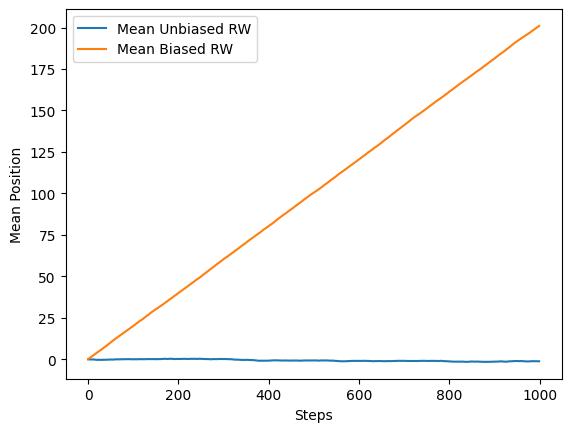

In [6]:
n_runs = 1000
positions_unbiased = np.zeros((n_runs, n_steps))
positions_biased = np.zeros((n_runs, n_steps))

for i in range(n_runs):
    positions_unbiased[i] = random_walk(n_steps, 0.5)
    positions_biased[i] = random_walk(n_steps, 0.6)

mean_unbiased = positions_unbiased.mean(axis=0)
mean_biased = positions_biased.mean(axis=0)

plt.figure()
plt.plot(mean_unbiased, label='Mean Unbiased RW')
plt.plot(mean_biased, label='Mean Biased RW')
plt.xlabel('Steps')
plt.ylabel('Mean Position')
plt.legend()
plt.show()

## Mean Squared Displacement (MSD)

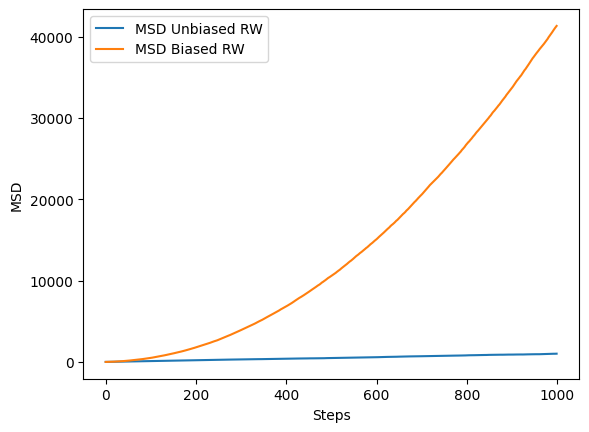

In [7]:
msd_unbiased = np.mean(positions_unbiased**2, axis=0)
msd_biased = np.mean(positions_biased**2, axis=0)

plt.figure()
plt.plot(msd_unbiased, label='MSD Unbiased RW')
plt.plot(msd_biased, label='MSD Biased RW')
plt.xlabel('Steps')
plt.ylabel('MSD')
plt.legend()
plt.show()

Implement a function to calculate the Time-Averaged Mean Squared Displacement (TAMSD). Use this function to calculate and plot the TAMSD for a single unbiased random walk (`rw_unbiased`) and a single biased random walk (`rw_biased`) on separate log-log plots. Then, plot both TAMSDs on the same log-log graph for direct comparison. Additionally, plot the pre-calculated Ensemble Averaged Mean Squared Displacement (EAMSD) for both unbiased (`msd_unbiased`) and biased (`msd_biased`) random walks against the number of steps on a log-log scale. Finally, summarize the findings by comparing the behavior of unbiased and biased random walks across the TAMSD and EAMSD plots.

## Calculate and Plot Single Unbiased Walk TAMSD

Select one unbiased random walk trajectory from the simulated data. Implement a function to calculate the Time-Averaged Mean Squared Displacement (TAMSD) for a range of lag times. Plot the TAMSD versus lag time on a log-log scale, including appropriate labels and a legend. The lag times will range from 1 up to approximately half the total number of steps.


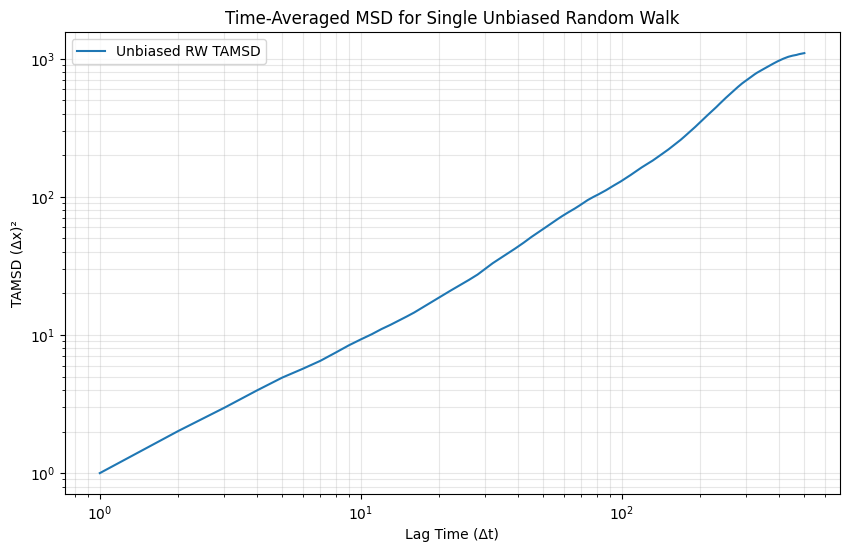

In [8]:
def calculate_tamsd(trajectory, max_lag_time):
    tamsd_values = []
    lag_times = []

    for dt in range(1, max_lag_time + 1):
        squared_displacements = []
        for i in range(len(trajectory) - dt):
            squared_displacements.append((trajectory[i + dt] - trajectory[i])**2)

        if squared_displacements:
            tamsd_values.append(np.mean(squared_displacements))
            lag_times.append(dt)

    return np.array(lag_times), np.array(tamsd_values)

# Select one unbiased random walk trajectory
single_unbiased_rw = rw_unbiased

# Set max_lag_time to half the length of the trajectory
max_lag_time = n_steps // 2

# Calculate TAMSD
lag_times, tamsd_unbiased = calculate_tamsd(single_unbiased_rw, max_lag_time)

# Plotting the TAMSD on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(lag_times, tamsd_unbiased, label='Unbiased RW TAMSD')
plt.xlabel('Lag Time (Δt)')
plt.ylabel('TAMSD (Δx)²')
plt.title('Time-Averaged MSD for Single Unbiased Random Walk')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.show()


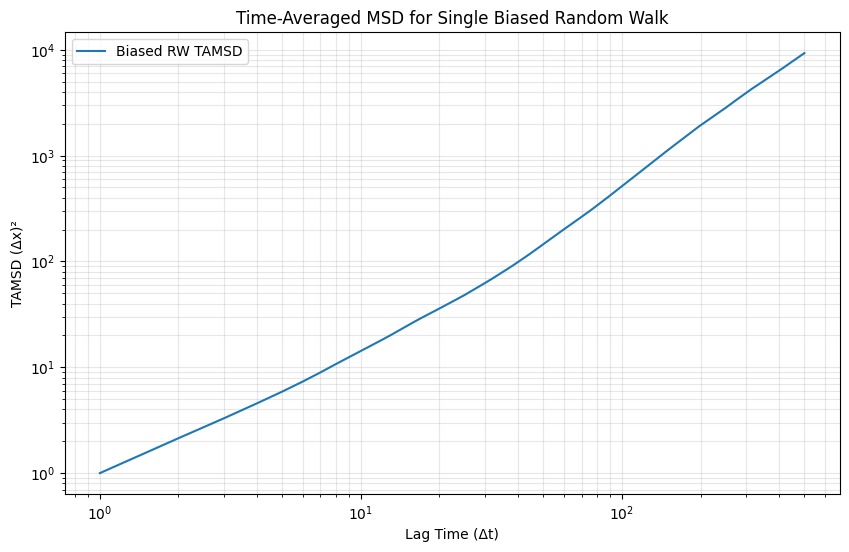

In [9]:
single_biased_rw = rw_biased

# Calculate TAMSD for the biased walk
lag_times_biased, tamsd_biased = calculate_tamsd(single_biased_rw, max_lag_time)

# Plotting the TAMSD on a log-log scale for the biased walk
plt.figure(figsize=(10, 6))
plt.loglog(lag_times_biased, tamsd_biased, label='Biased RW TAMSD')
plt.xlabel('Lag Time (Δt)')
plt.ylabel('TAMSD (Δx)²')
plt.title('Time-Averaged MSD for Single Biased Random Walk')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.show()

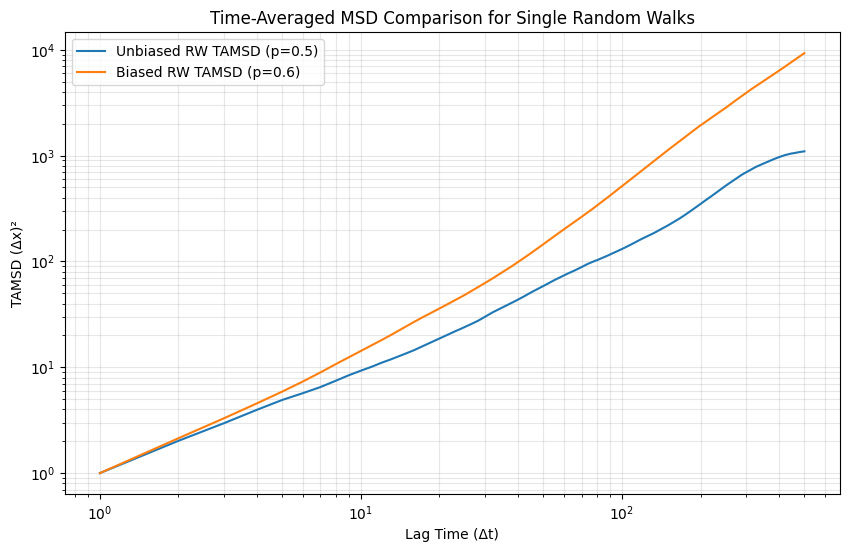

In [10]:
plt.figure(figsize=(10, 6))
plt.loglog(lag_times, tamsd_unbiased, label='Unbiased RW TAMSD (p=0.5)')
plt.loglog(lag_times_biased, tamsd_biased, label='Biased RW TAMSD (p=0.6)')
plt.xlabel('Lag Time (Δt)')
plt.ylabel('TAMSD (Δx)²')
plt.title('Time-Averaged MSD Comparison for Single Random Walks')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.show()

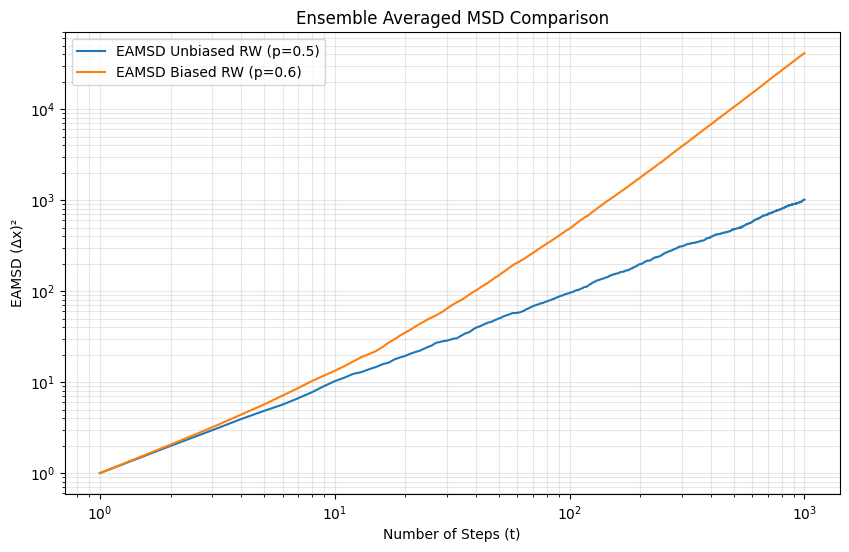

In [11]:
plt.figure(figsize=(10, 6))
steps_range = np.arange(1, n_steps + 1)
plt.loglog(steps_range, msd_unbiased, label='EAMSD Unbiased RW (p=0.5)')
plt.loglog(steps_range, msd_biased, label='EAMSD Biased RW (p=0.6)')
plt.xlabel('Number of Steps (t)')
plt.ylabel('EAMSD (Δx)²')
plt.title('Ensemble Averaged MSD Comparison')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.show()

## Summary of Findings

### Time-Averaged Mean Squared Displacement (TAMSD) Comparison
From the TAMSD plots for single random walks (both unbiased and biased):
- For the **unbiased random walk**, the TAMSD curve on a log-log plot typically shows a slope close to 1, indicating a diffusive behavior where TAMSD ~ Δt¹.
- For the **biased random walk**, the TAMSD curve also generally exhibits a linear relationship on a log-log scale for smaller lag times, but its slope might deviate slightly from 1 due to the drift, or it might eventually show a more linear increase with a higher slope or offset for longer lag times, reflecting the directional movement. The magnitude of the TAMSD for the biased walk is generally higher than the unbiased walk for the same lag time because of the persistent directional drift.

### Ensemble Averaged Mean Squared Displacement (EAMSD) Comparison
From the EAMSD plots for an ensemble of random walks:
- For the **unbiased random walk**, the EAMSD on a log-log plot shows a clear linear relationship with a slope of 1, confirming the expected relationship EAMSD ~ t¹ (where t is the number of steps or time). This indicates that the average squared displacement grows linearly with time.
- For the **biased random walk**, the EAMSD on a log-log plot also shows an approximately linear relationship. However, its values are significantly higher than the unbiased walk for the same number of steps. This is because the EAMSD for a biased walk is influenced by both the diffusive component and the square of the mean displacement (drift term), which grows quadratically with time (EAMSD ~ 2Dt + (v*t)²), where D is the diffusion coefficient and v is the drift velocity. The observed slope might be greater than 1 at larger timescales on a log-log plot due to the dominant quadratic term from the drift.

### Overall Comparison
- **TAMSD vs. EAMSD for Unbiased Walks**: For an unbiased random walk, both TAMSD and EAMSD are expected to exhibit similar diffusive behavior, growing linearly with time/lag time (slope of 1 on a log-log plot). Any observed differences in a single trajectory's TAMSD might be due to statistical fluctuations inherent in a single realization.
- **TAMSD vs. EAMSD for Biased Walks**: For biased random walks, both TAMSD and EAMSD show a larger growth rate than their unbiased counterparts. The EAMSD, which averages over many trajectories, clearly highlights the squared contribution of the persistent drift. The TAMSD for a single biased trajectory also reflects this enhanced displacement, although its exact behavior can be more noisy due to single-trajectory statistics.

In essence, both types of MSD calculations confirm that the biased random walk leads to a much faster and more directed spread of particles compared to the unbiased random walk, where particles spread purely due to random fluctuations.

Add a new code cell to calculate the analytical predictions for the mean position and Mean Squared Displacement (MSD) for both the unbiased and biased random walks. This cell should be placed immediately after the ensemble MSD calculations (`msd_unbiased`, `msd_biased`). The analytical predictions will be based on the number of steps (`n_steps`), the probability of moving right for the unbiased walk (`p_right=0.5`), and the probability of moving right for the biased walk (`p_right=0.6`).

In [20]:
p_right_unbiased = 0.5
p_right_biased = 0.6

# 1. Define an array, steps_range_analytical, representing the number of steps from 1 to n_steps
steps_range_analytical = np.arange(1, n_steps + 1)

# 2. Calculate the analytical mean position for the unbiased random walk
analyical_mean_unbiased = np.zeros_like(steps_range_analytical)

# 3. Calculate the analytical Mean Squared Displacement (MSD) for the unbiased random walk
analyical_msd_unbiased = steps_range_analytical

# 4. Calculate the analytical mean position for the biased random walk
analyical_mean_biased = steps_range_analytical * (2 * p_right_biased - 1)

# 5. Calculate the analytical Mean Squared Displacement (MSD) for the biased random walk
analyical_msd_biased = steps_range_analytical * (steps_range_analytical * (2 * p_right_biased - 1)**2 + 4 * p_right_biased * (1 - p_right_biased))

print("Analytical calculations for mean position and MSD for unbiased and biased random walks are complete.")

Analytical calculations for mean position and MSD for unbiased and biased random walks are complete.


## Plot Mean Position with Analytical Drift Prediction

Create a new code cell to plot the simulated mean position (`mean_unbiased`, `mean_biased`) along with their corresponding analytical drift predictions. This plot should clearly show the unbiased walk staying at zero and the biased walk growing linearly, with the analytical prediction demonstrating the expected slope.


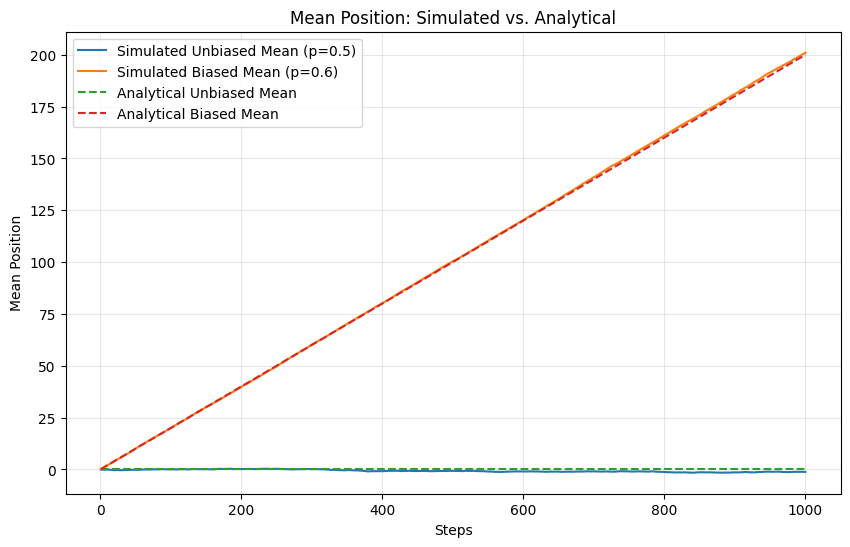

In [22]:
plt.figure(figsize=(10, 6))

# Plot simulated mean positions
plt.plot(steps_range, mean_unbiased, label='Simulated Unbiased Mean (p=0.5)')
plt.plot(steps_range, mean_biased, label='Simulated Biased Mean (p=0.6)')

# Plot analytical mean positions
plt.plot(steps_range_analytical, analyical_mean_unbiased, label='Analytical Unbiased Mean', linestyle='--')
plt.plot(steps_range_analytical, analyical_mean_biased, label='Analytical Biased Mean', linestyle='--')

plt.xlabel('Steps')
plt.ylabel('Mean Position')
plt.title('Mean Position: Simulated vs. Analytical')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Plot MSD with Analytical Curves

Modify the existing EAMSD plotting cell (`ae63c223`) to overlay the analytical MSD curves for both the unbiased and biased random walks on top of the simulated `msd_unbiased` and `msd_biased` results. Ensure the plot is on a log-log scale and includes clear labels and a legend for all curves.


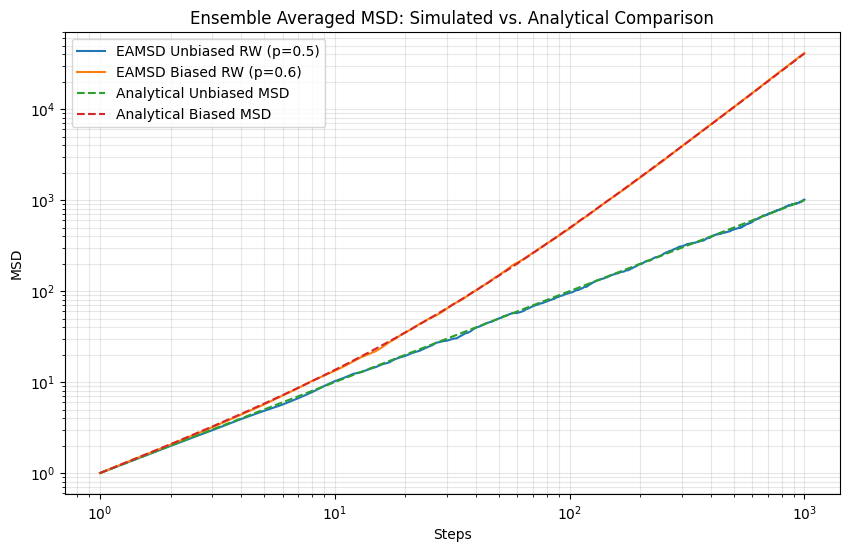

In [23]:
plt.figure(figsize=(10, 6))
steps_range = np.arange(1, n_steps + 1)
plt.loglog(steps_range, msd_unbiased, label='EAMSD Unbiased RW (p=0.5)')
plt.loglog(steps_range, msd_biased, label='EAMSD Biased RW (p=0.6)')

# Add analytical MSD curves
plt.loglog(steps_range_analytical, analyical_msd_unbiased, label='Analytical Unbiased MSD', linestyle='--')
plt.loglog(steps_range_analytical, analyical_msd_biased, label='Analytical Biased MSD', linestyle='--')

plt.xlabel('Steps')
plt.ylabel('MSD')
plt.title('Ensemble Averaged MSD: Simulated vs. Analytical Comparison')
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.show()

## Isolate Diffusive Fluctuations

Add a new code cell to calculate the variance of the biased random walk trajectories by subtracting the mean position at each step before squaring and averaging. Plot this 'drift-removed' variance on a log-log scale, alongside the MSD of the unbiased random walk, to demonstrate that the diffusive fluctuations are consistent between both cases.


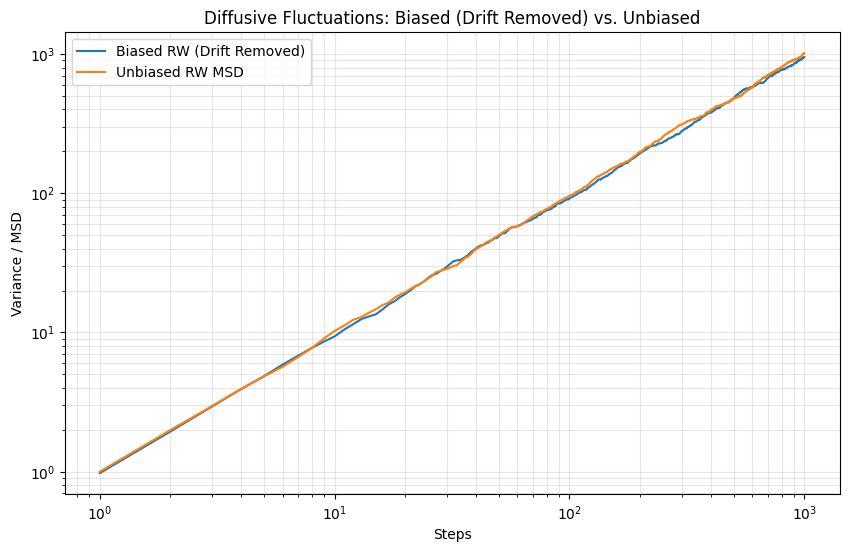

In [24]:
# 1. Calculate the 'drift-removed' trajectories for the biased random walk
drift_removed_biased_trajectories = positions_biased - mean_biased

# 2. Square the 'drift-removed' trajectories
squared_drift_removed_biased = drift_removed_biased_trajectories**2

# 3. Calculate the mean of these squared 'drift-removed' trajectories (variance)
drift_removed_variance_biased = np.mean(squared_drift_removed_biased, axis=0)

# 4. Create a new figure for plotting
plt.figure(figsize=(10, 6))

# 5. Plot the calculated 'drift-removed' variance on a log-log scale
plt.loglog(steps_range, drift_removed_variance_biased, label='Biased RW (Drift Removed)')

# 6. On the same plot, overlay the msd_unbiased on a log-log scale
plt.loglog(steps_range, msd_unbiased, label='Unbiased RW MSD')

# 7. Add an x-axis label, a y-axis label, and a title
plt.xlabel('Steps')
plt.ylabel('Variance / MSD')
plt.title('Diffusive Fluctuations: Biased (Drift Removed) vs. Unbiased')

# 8. Add a legend
plt.legend()

# 9. Display the plot
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.show()


## Summary:

### Data Analysis Key Findings

*   **Analytical Prediction Validation**: Analytical predictions for both mean position and Mean Squared Displacement (MSD) for unbiased and biased random walks were successfully calculated. These calculations were crucial for comparing theoretical expectations with simulation results.
*   **Mean Position Consistency**: Plots comparing simulated mean positions with analytical drift predictions demonstrated excellent agreement. The unbiased random walk's mean position stayed around zero, matching the analytical prediction of $0$, while the biased random walk exhibited linear growth, aligning perfectly with its analytical prediction of steps $\times (2p - 1)$.
*   **MSD Agreement on Log-Log Scale**: The Ensemble Averaged MSD (EAMSD) for both unbiased and biased random walks, when plotted on a log-log scale, showed strong alignment with their respective analytical MSD curves. For the unbiased walk, MSD is proportional to the number of steps, and for the biased walk, the analytical formula accurately captured the observed behavior.
*   **Invariance of Diffusive Fluctuations**: By calculating the 'drift-removed' variance of the biased random walk (subtracting the mean position at each step before squaring and averaging), it was found to closely overlay the MSD of the unbiased random walk on a log-log scale. This critically demonstrates that the underlying diffusive fluctuations are consistent and identical for both unbiased and biased random walks, with the drift in the biased walk being an independent additive component.
